## Unsupervised Learning - Association Rules

### Analyse the book store data and help the business understand customer interests and also increase the customer footfall.

 Data:
     The transactions made by the customers are captured by the store. 
     
 Description: 
     A total of 2000 transaction data.

In [1]:
# import libraries
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# import the data file
book = pd.read_csv(r"D:\360digi\DS\Sharath\Association_Rules_2\handson\Association_Rules-Assignment_Datasets\book.csv")
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [4]:
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [5]:
### Elementary Analysis ###
# Most popular items
count = book.loc[:, :].sum()
print(count)

ChildBks     846
YouthBks     495
CookBks      862
DoItYBks     564
RefBks       429
ArtBks       482
GeogBks      552
ItalCook     227
ItalAtlas     74
ItalArt       97
Florence     217
dtype: int64


In [7]:
pop_item = count.sort_values(0, ascending = False).head(12)
pop_item

CookBks      862
ChildBks     846
DoItYBks     564
GeogBks      552
YouthBks     495
ArtBks       482
RefBks       429
ItalCook     227
Florence     217
ItalArt       97
ItalAtlas     74
dtype: int64

In [8]:
pop_item = pop_item.to_frame()
pop_item

,0
CookBks,862
ChildBks,846
DoItYBks,564
GeogBks,552
YouthBks,495
ArtBks,482
RefBks,429
ItalCook,227
Florence,217
ItalArt,97


In [9]:
pop_item = pop_item.reset_index()
pop_item

,index,0
0,CookBks,862
1,ChildBks,846
2,DoItYBks,564
3,GeogBks,552
4,YouthBks,495
5,ArtBks,482
6,RefBks,429
7,ItalCook,227
8,Florence,217
9,ItalArt,97


In [10]:
pop_item = pop_item.rename(columns = {"index": "items", 0: "count"})
pop_item

,items,count
0,CookBks,862
1,ChildBks,846
2,DoItYBks,564
3,GeogBks,552
4,YouthBks,495
5,ArtBks,482
6,RefBks,429
7,ItalCook,227
8,Florence,217
9,ItalArt,97


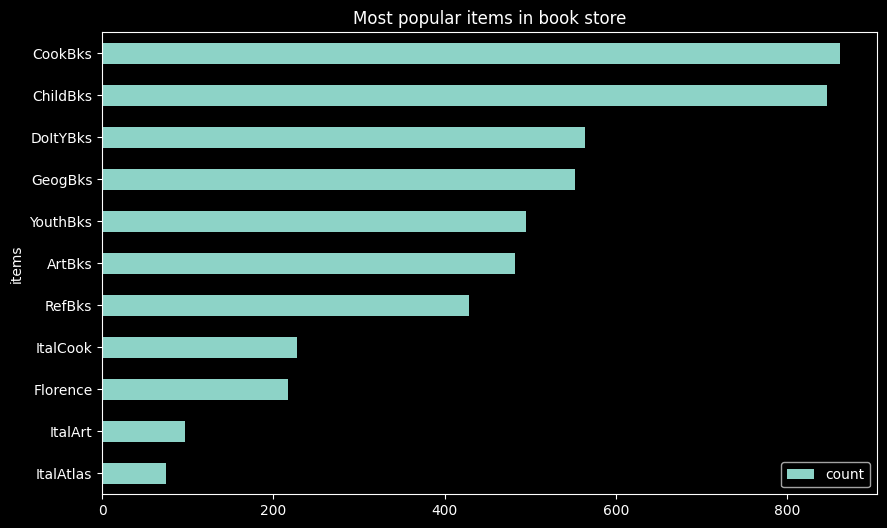

In [11]:
# Data Visualization
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6) # rc stands for runtime configuration 
matplotlib.style.use('dark_background')
ax = pop_item.plot.barh(x = 'items', y = 'count')
plt.title('Most popular items in book store')
plt.gca().invert_yaxis() # gca means "get current axes"

In [ ]:
# The most popular books are CookBks and ChildBks. 
# The second most popular ones are DoItYBks and GeogBks.

### Apriori Algorithm

In [12]:
# Itemsets
frequent_itemsets = apriori(book, min_support = 0.0075, max_len = 4, use_colnames = True)
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
461,0.0090,"(GeogBks, ItalArt, ArtBks, Florence)"
462,0.0125,"(ItalArt, ArtBks, ItalAtlas, ItalCook)"
463,0.0095,"(ItalArt, ArtBks, Florence, ItalCook)"
464,0.0090,"(GeogBks, ItalArt, ItalAtlas, ItalCook)"


In [13]:
# Most frequent itemsets based on support 
frequent_itemsets.sort_values('support', ascending = False, inplace = True)
frequent_itemsets

,support,itemsets
2,0.4310,(CookBks)
0,0.4230,(ChildBks)
3,0.2820,(DoItYBks)
6,0.2760,(GeogBks)
12,0.2560,"(CookBks, ChildBks)"
...,...,...
423,0.0075,"(GeogBks, ItalArt, Florence, CookBks)"
346,0.0075,"(CookBks, YouthBks, Florence, ItalCook)"
408,0.0075,"(RefBks, CookBks, Florence, ItalCook)"
351,0.0075,"(DoItYBks, YouthBks, Florence, RefBks)"


In [14]:
# Association Rules
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1)
print(rules.head(20))

   antecedents consequents  antecedent support  consequent support  support  \
0    (CookBks)  (ChildBks)              0.4310              0.4230   0.2560   
1   (ChildBks)   (CookBks)              0.4230              0.4310   0.2560   
2    (GeogBks)  (ChildBks)              0.2760              0.4230   0.1950   
3   (ChildBks)   (GeogBks)              0.4230              0.2760   0.1950   
4    (GeogBks)   (CookBks)              0.2760              0.4310   0.1925   
5    (CookBks)   (GeogBks)              0.4310              0.2760   0.1925   
6    (CookBks)  (DoItYBks)              0.4310              0.2820   0.1875   
7   (DoItYBks)   (CookBks)              0.2820              0.4310   0.1875   
8   (DoItYBks)  (ChildBks)              0.2820              0.4230   0.1840   
9   (ChildBks)  (DoItYBks)              0.4230              0.2820   0.1840   
10   (CookBks)    (ArtBks)              0.4310              0.2410   0.1670   
11    (ArtBks)   (CookBks)              0.2410      

In [15]:
rules.sort_values('lift', ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2142,"(ItalArt, RefBks)","(ArtBks, ItalAtlas)",0.0200,0.0180,0.0165,0.825000,45.833333,0.01614,5.611429
2143,"(ArtBks, ItalAtlas)","(ItalArt, RefBks)",0.0180,0.0200,0.0165,0.916667,45.833333,0.01614,11.760000
3339,"(GeogBks, ItalAtlas)","(ItalArt, RefBks)",0.0205,0.0200,0.0115,0.560976,28.048780,0.01109,2.232222
3342,"(ItalArt, RefBks)","(GeogBks, ItalAtlas)",0.0200,0.0205,0.0115,0.575000,28.048780,0.01109,2.304706
3150,"(ItalAtlas, ItalCook)","(ItalArt, RefBks)",0.0230,0.0200,0.0125,0.543478,27.173913,0.01204,2.146667
3147,"(ItalArt, RefBks)","(ItalAtlas, ItalCook)",0.0200,0.0230,0.0125,0.625000,27.173913,0.01204,2.605333
2608,"(ItalAtlas, ChildBks)","(ItalArt, RefBks)",0.0285,0.0200,0.0145,0.508772,25.438596,0.01393,1.995000
2605,"(ItalArt, RefBks)","(ItalAtlas, ChildBks)",0.0200,0.0285,0.0145,0.725000,25.438596,0.01393,3.532727
3887,"(ItalAtlas, DoItYBks)","(ItalArt, RefBks)",0.0190,0.0200,0.0095,0.500000,25.000000,0.00912,1.960000
3882,"(ItalArt, RefBks)","(ItalAtlas, DoItYBks)",0.0200,0.0190,0.0095,0.475000,25.000000,0.00912,1.868571


In [16]:
rules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4486 entries, 0 to 4485
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         4486 non-null   object 
 1   consequents         4486 non-null   object 
 2   antecedent support  4486 non-null   float64
 3   consequent support  4486 non-null   float64
 4   support             4486 non-null   float64
 5   confidence          4486 non-null   float64
 6   lift                4486 non-null   float64
 7   leverage            4486 non-null   float64
 8   conviction          4486 non-null   float64
dtypes: float64(7), object(2)
memory usage: 315.5+ KB


#### Handling Profusion of Rules (Duplication elimination)

In [17]:
def to_list(i):
    return (sorted(list(i)))

In [18]:
ma_X = rules.antecedents.apply(to_list) + rules.consequents.apply(to_list)

ma_X

0                          [CookBks, ChildBks]
1                          [ChildBks, CookBks]
2                          [GeogBks, ChildBks]
3                          [ChildBks, GeogBks]
4                           [GeogBks, CookBks]
                         ...                  
4481    [Florence, ItalCook, GeogBks, ItalArt]
4482    [GeogBks, Florence, ItalArt, ItalCook]
4483    [ItalArt, Florence, GeogBks, ItalCook]
4484    [Florence, GeogBks, ItalArt, ItalCook]
4485    [ItalCook, Florence, GeogBks, ItalArt]
Length: 4486, dtype: object

In [19]:
ma_X = ma_X.apply(sorted) #ma_X is having combined A and C but not sorted so again we need to sort it.
ma_X

0                          [ChildBks, CookBks]
1                          [ChildBks, CookBks]
2                          [ChildBks, GeogBks]
3                          [ChildBks, GeogBks]
4                           [CookBks, GeogBks]
                         ...                  
4481    [Florence, GeogBks, ItalArt, ItalCook]
4482    [Florence, GeogBks, ItalArt, ItalCook]
4483    [Florence, GeogBks, ItalArt, ItalCook]
4484    [Florence, GeogBks, ItalArt, ItalCook]
4485    [Florence, GeogBks, ItalArt, ItalCook]
Length: 4486, dtype: object

In [20]:
rules_sets = list(ma_X)
rules_sets

[['ChildBks', 'CookBks'],
 ['ChildBks', 'CookBks'],
 ['ChildBks', 'GeogBks'],
 ['ChildBks', 'GeogBks'],
 ['CookBks', 'GeogBks'],
 ['CookBks', 'GeogBks'],
 ['CookBks', 'DoItYBks'],
 ['CookBks', 'DoItYBks'],
 ['ChildBks', 'DoItYBks'],
 ['ChildBks', 'DoItYBks'],
 ['ArtBks', 'CookBks'],
 ['ArtBks', 'CookBks'],
 ['ChildBks', 'YouthBks'],
 ['ChildBks', 'YouthBks'],
 ['ArtBks', 'ChildBks'],
 ['ArtBks', 'ChildBks'],
 ['CookBks', 'YouthBks'],
 ['CookBks', 'YouthBks'],
 ['CookBks', 'RefBks'],
 ['CookBks', 'RefBks'],
 ['ChildBks', 'RefBks'],
 ['ChildBks', 'RefBks'],
 ['ChildBks', 'CookBks', 'GeogBks'],
 ['ChildBks', 'CookBks', 'GeogBks'],
 ['ChildBks', 'CookBks', 'GeogBks'],
 ['ChildBks', 'CookBks', 'GeogBks'],
 ['ChildBks', 'CookBks', 'GeogBks'],
 ['ChildBks', 'CookBks', 'GeogBks'],
 ['ChildBks', 'CookBks', 'DoItYBks'],
 ['ChildBks', 'CookBks', 'DoItYBks'],
 ['ChildBks', 'CookBks', 'DoItYBks'],
 ['ChildBks', 'CookBks', 'DoItYBks'],
 ['ChildBks', 'CookBks', 'DoItYBks'],
 ['ChildBks', 'CookBks', '

In [21]:
# set operation to have unique elements
unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]
unique_rules_sets

[['CookBks', 'DoItYBks', 'ItalArt', 'ItalAtlas'],
 ['ArtBks', 'ItalAtlas', 'RefBks', 'YouthBks'],
 ['CookBks', 'DoItYBks', 'Florence', 'GeogBks'],
 ['ArtBks', 'ChildBks', 'ItalCook', 'YouthBks'],
 ['CookBks', 'GeogBks', 'ItalAtlas', 'ItalCook'],
 ['ChildBks', 'DoItYBks', 'RefBks'],
 ['GeogBks', 'ItalAtlas', 'ItalCook', 'YouthBks'],
 ['ChildBks', 'ItalArt', 'ItalAtlas', 'RefBks'],
 ['GeogBks', 'RefBks'],
 ['CookBks', 'YouthBks'],
 ['ChildBks', 'ItalAtlas', 'YouthBks'],
 ['ChildBks', 'DoItYBks', 'ItalAtlas', 'YouthBks'],
 ['ArtBks', 'ChildBks', 'DoItYBks', 'GeogBks'],
 ['CookBks', 'GeogBks', 'ItalArt'],
 ['ArtBks', 'ItalArt', 'ItalAtlas', 'YouthBks'],
 ['DoItYBks', 'RefBks'],
 ['CookBks', 'ItalAtlas', 'RefBks', 'YouthBks'],
 ['ArtBks', 'GeogBks', 'ItalArt', 'ItalAtlas'],
 ['GeogBks', 'ItalCook', 'RefBks'],
 ['ChildBks', 'DoItYBks', 'Florence', 'GeogBks'],
 ['ArtBks', 'ItalArt', 'YouthBks'],
 ['ArtBks', 'CookBks', 'DoItYBks', 'ItalAtlas'],
 ['ChildBks', 'DoItYBks', 'RefBks', 'YouthBks'],


In [22]:
index_rules = []

for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))
    
index_rules

[4300,
 4056,
 2580,
 1324,
 2354,
 138,
 4286,
 2600,
 64,
 16,
 2396,
 4182,
 402,
 1392,
 4224,
 72,
 3156,
 3280,
 1186,
 2464,
 1534,
 4168,
 512,
 3480,
 444,
 1468,
 748,
 798,
 2326,
 50,
 144,
 132,
 3418,
 904,
 1262,
 984,
 4126,
 1870,
 3570,
 4444,
 1712,
 860,
 554,
 1808,
 1304,
 1048,
 4098,
 2292,
 1522,
 686,
 1372,
 1220,
 2450,
 4196,
 3122,
 526,
 782,
 1896,
 1082,
 294,
 1692,
 818,
 4140,
 3314,
 882,
 0,
 3190,
 4014,
 326,
 2984,
 2806,
 1568,
 3204,
 3604,
 462,
 1842,
 1980,
 916,
 3906,
 2168,
 2738,
 3508,
 1412,
 228,
 312,
 4360,
 3804,
 3320,
 2272,
 2710,
 86,
 354,
 3932,
 952,
 854,
 416,
 1150,
 4154,
 1748,
 2382,
 3742,
 1584,
 3494,
 1398,
 2498,
 3618,
 3176,
 10,
 4244,
 2526,
 2964,
 636,
 4314,
 574,
 3404,
 2690,
 2118,
 1502,
 1012,
 2614,
 884,
 34,
 3832,
 2210,
 826,
 2430,
 616,
 4374,
 2540,
 1192,
 12,
 1508,
 1474,
 1678,
 1164,
 2826,
 126,
 268,
 1596,
 2014,
 3474,
 3026,
 1624,
 2258,
 3012,
 638,
 1236,
 430,
 1972,
 1664,
 918,

In [23]:
# Rules without any redundancy 
rules_no_redundancy = rules.iloc[index_rules, :]
rules_no_redundancy

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4300,"(ItalArt, ItalAtlas, DoItYBks)",(CookBks),0.0095,0.4310,0.0080,0.842105,1.953841,0.003906,3.603667
4056,"(ArtBks, ItalAtlas, RefBks)",(YouthBks),0.0180,0.2475,0.0090,0.500000,2.020202,0.004545,1.505000
2580,"(Florence, CookBks, DoItYBks)",(GeogBks),0.0235,0.2760,0.0145,0.617021,2.235584,0.008014,1.890444
1324,"(ArtBks, YouthBks, ItalCook)",(ChildBks),0.0305,0.4230,0.0255,0.836066,1.976514,0.012598,3.519700
2354,"(GeogBks, CookBks, ItalAtlas)",(ItalCook),0.0160,0.1135,0.0150,0.937500,8.259912,0.013184,14.184000
...,...,...,...,...,...,...,...,...,...
1124,"(ItalArt, ArtBks)",(DoItYBks),0.0485,0.2820,0.0300,0.618557,2.193463,0.016323,1.882324
3522,"(ItalArt, RefBks)",(DoItYBks),0.0200,0.2820,0.0110,0.550000,1.950355,0.005360,1.595556
1062,"(ArtBks, YouthBks)",(ItalCook),0.1010,0.1135,0.0305,0.301980,2.660618,0.019036,1.270021
166,(ItalCook),(ChildBks),0.1135,0.4230,0.0850,0.748899,1.770446,0.036990,2.297877


In [24]:
rules_no_redundancy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 454 entries, 4300 to 2594
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         454 non-null    object 
 1   consequents         454 non-null    object 
 2   antecedent support  454 non-null    float64
 3   consequent support  454 non-null    float64
 4   support             454 non-null    float64
 5   confidence          454 non-null    float64
 6   lift                454 non-null    float64
 7   leverage            454 non-null    float64
 8   conviction          454 non-null    float64
dtypes: float64(7), object(2)
memory usage: 35.5+ KB


In [25]:
# Sorted list and top 10 rules 
rules10 = rules_no_redundancy.sort_values('lift', ascending = False).head(10)

rules10

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3308,"(GeogBks, ItalArt)",(ItalAtlas),0.0295,0.0370,0.0115,0.389831,10.535960,0.010408,1.578250
3280,"(GeogBks, ItalArt, ArtBks)",(ItalAtlas),0.0295,0.0370,0.0115,0.389831,10.535960,0.010408,1.578250
2188,(ItalArt),(ItalAtlas),0.0485,0.0370,0.0165,0.340206,9.194762,0.014706,1.459547
2182,"(ItalArt, ArtBks)",(ItalAtlas),0.0485,0.0370,0.0165,0.340206,9.194762,0.014706,1.459547
1876,"(CookBks, ItalArt, YouthBks)",(ItalCook),0.0195,0.1135,0.0190,0.974359,8.584661,0.016787,34.573500
2354,"(GeogBks, CookBks, ItalAtlas)",(ItalCook),0.0160,0.1135,0.0150,0.937500,8.259912,0.013184,14.184000
2984,"(CookBks, ArtBks, ItalAtlas)",(ItalCook),0.0140,0.1135,0.0130,0.928571,8.181246,0.011411,12.411000
2498,"(GeogBks, ItalArt, DoItYBks)",(ItalCook),0.0165,0.1135,0.0150,0.909091,8.009612,0.013127,9.751500
2854,"(ItalArt, YouthBks, DoItYBks)",(ItalCook),0.0150,0.1135,0.0130,0.866667,7.635830,0.011297,6.648750
3068,"(GeogBks, ItalArt, YouthBks)",(ItalCook),0.0145,0.1135,0.0125,0.862069,7.595321,0.010854,6.427125


<AxesSubplot:xlabel='support', ylabel='confidence'>

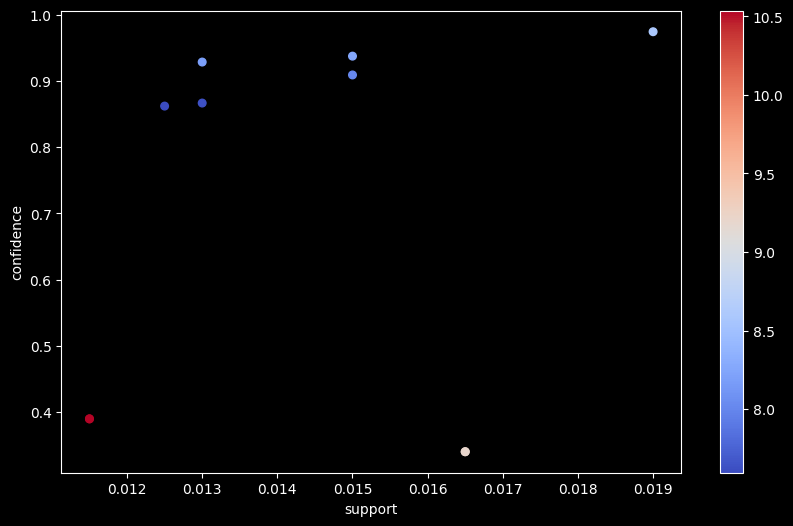

In [26]:
rules10.plot(x = "support", y = "confidence", c = rules10.lift, kind="scatter", s = 30, cmap = plt.cm.coolwarm)

In [ ]:
# Based on the association rules formed and lift ratio. We can come up with various strategies to get attention from the customers by placing relevant books close to each other. Which also works similar to online suggestions. 
# The rule DoItYBks, RefBks, ItalArt is paried with ItalAtlas, then the least selling book would be attracted to customers.
# If the ItalAtlas book is placed next to ItalArt, RefBks the customers might be interested in buying.
# Customers who buy these books YouthBks, ItalArt, ChildBks might also be interested in ItalAtlas.
# Similarly by looking at various rules we can come up with bundling of the books and also create offers/advertisements to attract customers to the store.